# CV Problem Solution Code for MIDAS:IIITD


## Import Libraries

### For extracting data from *.pkl file

In [ ]:
import pickle as pkl
import numpy as np



### For DL Model and Dataset ops

In [ ]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
from keras import regularizers
from sklearn.model_selection import train_test_split

### For Generating Plots after training

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

### Create Network Model
A CNN is trained with the parameters in the snippet.
The function returns 'history' dictionary, which holds accuracy, loss, val_acc, val_loss values over all epochs. The model also returns predictions for the testing dataset provided. The network has 100k parameters, approximately.

In [29]:
def network(batch_size, epochs, train_X, train_y, valid_X, valid_y):
    ## Train
    kernel_size = (3, 3)
    model = Sequential()
    # 16 Filters of the size of input image
    model.add(Conv2D(16, kernel_size, activation = 'linear', input_shape = (28,28,1), padding = 'same'))
    
    # Negative gradient ratio of LeakyReLU activation
    model.add(LeakyReLU(alpha = 0.1))
    
    # Store only the maximum values from the 2x2 window
    model.add(MaxPooling2D((2,2), padding = 'same'))
    
    # 32 filters of half the size, 14x14
    model.add(Conv2D(32, kernel_size, activation = 'linear', padding = 'same'))
    
    model.add(LeakyReLU(alpha = 0.01))
    model.add(MaxPooling2D((2,2), padding = 'same'))
    
    # Flatten the layers into an array
    model.add(Flatten())
    
    # Add 64 Densely connected units. Also called FC layer
    model.add(Dense(64, activation = 'linear'))
    model.add(LeakyReLU(alpha = 0.1))
    
    # Softmax to convert into class probabilities
    model.add(Dense(num_classes, activation = 'softmax'))

    model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.sgd(), metrics = ['accuracy'])
    ## Optionally view model summary 
    # model.summary()

    history = model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, verbose = 2, validation_data = (valid_X, valid_y))
    test_y = model.predict_classes(test_X)

    return history, test_y

### This is the main code, executed in sequence.
First, we visualize a sample image from the dataset, and its associated label.

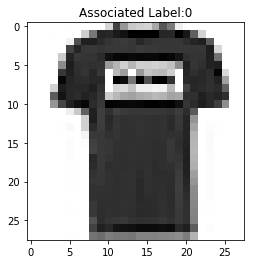

Training Data:(5600, 28, 28, 1)
Validation Data:(2400, 28, 28, 1)
Training Labels:(5600, 7)
Validation Labels:(2400, 7)
Train on 5600 samples, validate on 2400 samples
Epoch 1/10
 - 31s - loss: 0.6899 - acc: 0.7129 - val_loss: 0.5138 - val_acc: 0.7963
Epoch 2/10


KeyboardInterrupt: 

In [36]:
train_X, train_y, test_X, num_classes = extract()
plt.imshow(train_X[0].reshape(28, 28), cmap = 'gray_r')
plt.title('Associated Label:' + str(np.argmax(train_y[0])))
plt.show()
train_X, train_y, valid_X, valid_y = split(train_X, train_y)
data_summary(train_X, train_y, valid_X, valid_y)
history, predictions = network(1, 10, train_X, train_y, valid_X, valid_y)
plots(history)
print(predictions)


### Results 
You can see the plots in the previous code snippet.
For 10 epochs and batch_size of 1:

Metric | Training Set (5600) | Validation Set (2400)
-------|---------------------|----------------------
Accuracy | 91% | 85%
Loss | 0.22 | 0.43

It is evident that model starts overfitting above 10 epochs.

### extract() Function to convert dataset to numpy arrays
After converting to numpy arrays, the arrays are reshaped to 28x28 images, and normalized between 0-1 for 8-bit images

In [12]:
def extract():

    ## Unpack and prep Dataset
    with open('train_image.pkl', 'rb') as ti:
        train_X = pkl.load(ti)

    with open('train_label.pkl', 'rb') as tl:
        train_y = pkl.load(tl)

    with open('test_image.pkl', 'rb') as test:
        test_X = pkl.load(test)

    # Lists -> arrays
    train_X = np.asarray(train_X)
    train_y = np.asarray(train_y)
    test_X = np.asarray(test_X)

    # Reshape X to matrix of 28x28 each
    # -1 arg means self-inference
    train_X = train_X.reshape(-1, 28, 28, 1)
    test_X = test_X.reshape(-1, 28, 28, 1)
    # Normalization
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    train_X = train_X / 255
    test_X = test_X / 255

    # One-hot labels
    train_y = to_categorical(train_y)
    num_classes = train_y.shape[1]
    return train_X, train_y, test_X, num_classes

### split() Function to divide the dataset into training and validation sets
Used 70:30 ratio for Training and Validation, respectively.

In [13]:
def split(train_X, train_y):
    train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size = 0.3)
    return train_X, train_y, valid_X, valid_y

### Summarize the whole dataset

In [14]:
def data_summary(train_X, train_y, valid_X, valid_y):
    print("========================================================================")
    print("Training Data:" + str(train_X.shape))
    print("Validation Data:" + str(valid_X.shape))
    print("Training Labels:" + str(train_y.shape))
    print("Validation Labels:" + str(valid_y.shape))
    print("========================================================================")

### This function plots the results from 'history' on invoke.

In [16]:
def plots(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

